<a href="https://colab.research.google.com/github/rahiakela/nlp-research-and-practice/blob/main/think-stats/02_probability_mass_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [1]:
import numpy as np
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded first.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [4]:
from collections import Counter

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [5]:
# agian, let's select live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome ==1]

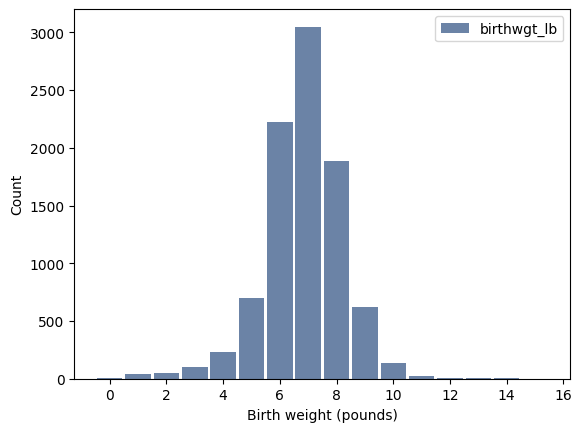

In [6]:
# Here's the histogram of birth weights
hist = thinkstats2.Hist(live.birthwgt_lb, label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Count")

##PMF

A probability is a frequency expressed as a
fraction of the sample size, `n`. To get from frequencies to probabilities, we divide through
by `n`, which is called normalization.

Another way to represent a distribution is a probability mass function (PMF), which
maps from each value to its probability

Given a Hist, we can make a dictionary that maps from each value to its probability:

In [7]:
# To normalize the disrtibution, we could divide through by the total count
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
  pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

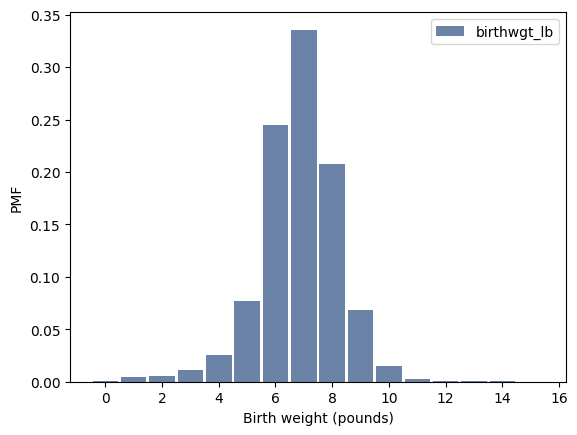

In [8]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="PMF")

More directly, we can create a PMF object.

In [9]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

The PMF is normalized so total probability is 1.

In [10]:
pmf.Prob(2)

0.4

In [11]:
pmf.Prob(3)

0.2

In [13]:
pmf[2]

0.4

In [14]:
pmf[3]

0.2

The biggest difference is that a Hist maps from values to integer
counters; a PMF maps from values to floating-point probabilities.

We can modify an existing PMF by incrementing the probability associated with a value

In [15]:
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

In [17]:
pmf.Incr(3, 0.5)
pmf[3]

0.7

Or you can multiply a probability by a factor.

In [18]:
pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

If you modify a PMF, the result may not be normalized; that is, the probabilities may no
longer add up to 1.

Total returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [19]:
pmf.Total()

1.4

Normalize divides through by the total probability, making it 1 again.

In [20]:
pmf.Normalize()
pmf.Total()

1.0

##Plotting PMFs

In [ ]:
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [ ]:
hist.Freq(2)

2

In [ ]:
hist[2]

2

In [ ]:
hist[4]

0

In [ ]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [ ]:
for val in sorted(hist.Values()):
  print(val, hist[val])

1 1
2 2
3 1
5 1


In [ ]:
for val, freq in hist.Items():
  print(val, freq)

1 1
2 2
3 1
5 1


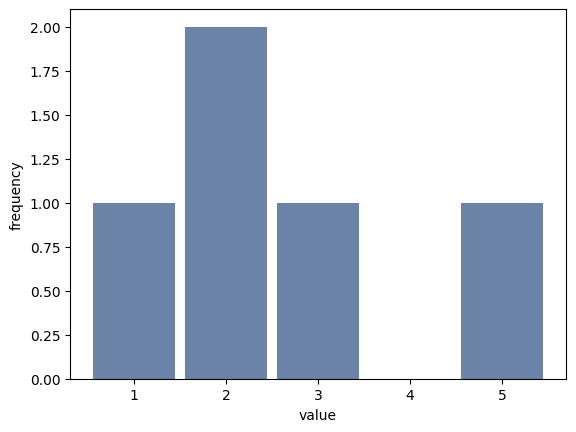

In [ ]:
# let's plot histogram
thinkplot.Hist(hist)
thinkplot.Config(xlabel="value", ylabel="frequency")

##Dataset

In [ ]:
# let's start by reading the data and selecting records for live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

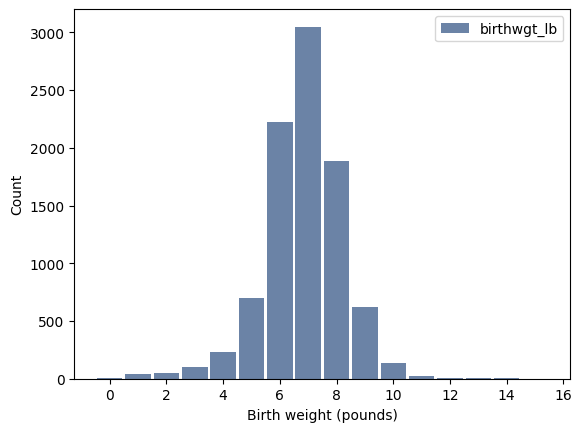

In [ ]:
# let's generate and plot the histogram of birthwgt_lb for live births
hist = thinkstats2.Hist(live.birthwgt_lb, label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Count")

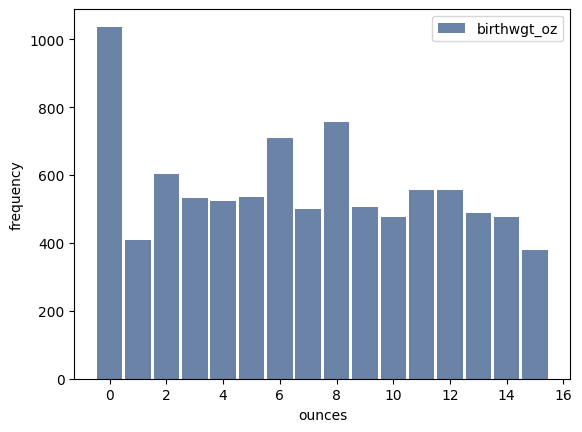

In [ ]:
# let's plot the histogram of pregnancy lengths (column prglngth).
hist = thinkstats2.Hist(live.birthwgt_oz, label="birthwgt_oz")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="ounces", ylabel="frequency")

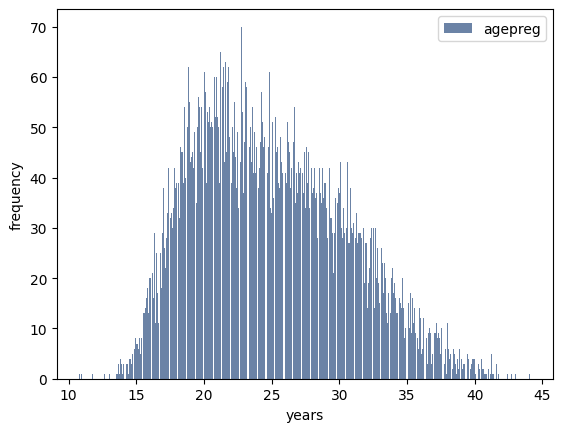

In [ ]:
# let's plot the histogram of mother’s age at end of pregnancy
hist = thinkstats2.Hist(live.agepreg, label="agepreg")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="years", ylabel="frequency")

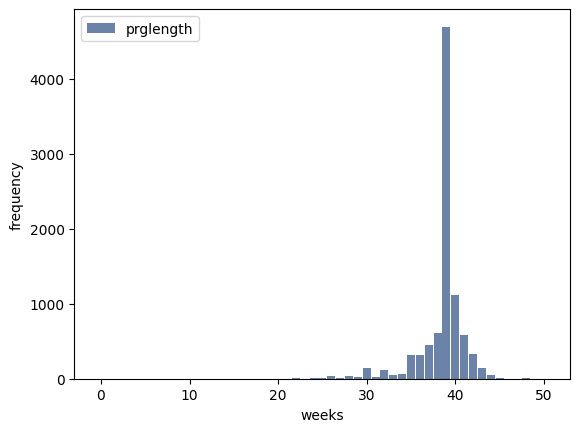

In [ ]:
# let's plot the histogram of pregnancy length in weeks
hist = thinkstats2.Hist(live.prglngth, label="prglength")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="weeks", ylabel="frequency")

##Outliers

In [ ]:
# Hist provides smallest, which select the lowest values and their frequencies.
for weeks, freq in hist.Smallest(10):
  print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [ ]:
# Hist provides largest, which select the largest values and their frequencies.
for weeks, freq in hist.Largest(10):
  print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


In [ ]:
# let's select first babies and others using birthord, then compute histograms of pregnancy length for the two groups
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label="first")
other_hist = thinkstats2.Hist(others.prglngth, label="other")

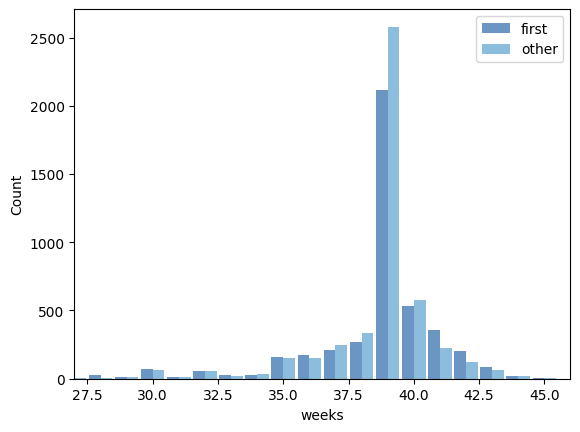

In [ ]:
# We can use width and align to plot two histograms side-by-side
width = 0.45
thinkplot.PrePlot(2)

thinkplot.Hist(first_hist, align="right", width=width)
thinkplot.Hist(other_hist, align="left", width=width)
thinkplot.Config(xlabel="weeks", ylabel="Count", xlim=[27, 46])

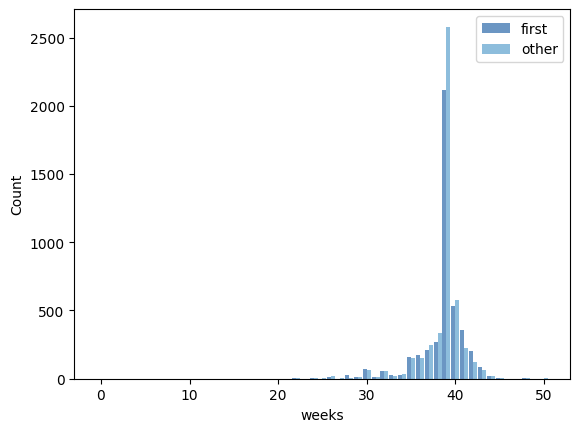

In [ ]:
# We can use width and align to plot two histograms side-by-side
width = 0.45
thinkplot.PrePlot(2)

thinkplot.Hist(first_hist, align="right", width=width)
thinkplot.Hist(other_hist, align="left", width=width)
thinkplot.Config(xlabel="weeks", ylabel="Count")

Histograms are useful because they make the most frequent values immediately apparent.
But they are not the best choice for comparing two distributions.

We address this problem using
probability mass functions.

##Summarizing Distributions

In [ ]:
# let's compute mean, variance and standard deviation
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [ ]:
(mean, var, std)

(38.56055968517709, 7.302662067826817, 2.702343810070587)

In [ ]:
# let's confirm that std is the square root of var
np.sqrt(var)

2.702343810070587

In [ ]:
# Here's are the mean pregnancy lengths for first babies and others
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [ ]:
# And here's the difference (in weeks):
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

In [ ]:
# This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations
def cohen_effect_size(group1, group2):
  diff = group1.mean() - group2.mean()

  var1 = group1.var()
  var2 = group2.var()
  n1, n2 = len(group1), len(group2)

  pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
  d = diff / np.sqrt(pooled_var)
  return d

In [ ]:
# let's compute the Cohen effect size for the difference in pregnancy length for first babies and others
ces = cohen_effect_size(firsts.prglngth, others.prglngth)
ces

0.028879044654449834

##Exercises